From https://pub.towardsai.net/text-classification-with-simple-transformers-a29d13358135

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from simpletransformers.classification import ClassificationModel, ClassificationArgs

Shape of train set (7613, 5)
Shape of test set (3263, 4)


<AxesSubplot: xlabel='labels', ylabel='count'>

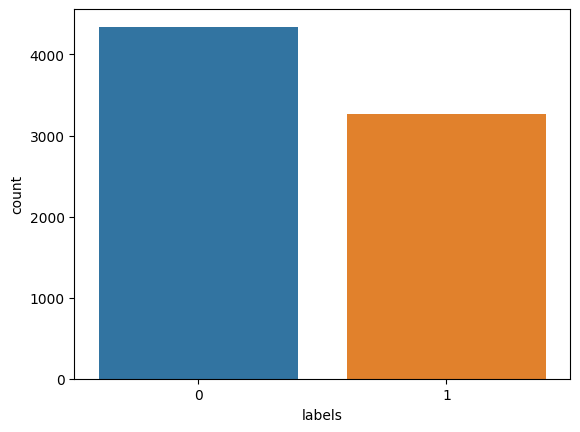

In [49]:
os.environ['TOKENIZERS_PARALLELISM'] =  'True'
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
print(f'Shape of train set {train.shape}')
print(f'Shape of test set {test.shape}')
train.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
test.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
train.columns = ['text', 'labels']
train_df, valid_df = train_test_split(train, test_size=0.2, stratify=train['labels'], random_state=42)
sns.countplot(x=train['labels'])

In [50]:
model_args = ClassificationArgs(num_train_epochs=1, overwrite_output_dir=True, manual_seed=42, best_model_dir='./outputs_roberta/', evaluate_during_training=True)
model = ClassificationModel(model_type='roberta', model_name='roberta-base', use_cuda=False, num_labels=2, args=model_args)
model.train_model(train_df, eval_df=valid_df, acc=accuracy_score)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

  0%|          | 0/6090 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/762 [00:00<?, ?it/s]

  0%|          | 0/1523 [00:00<?, ?it/s]

(762,
 defaultdict(list,
             {'global_step': [762],
              'train_loss': [0.031075049191713333],
              'mcc': [0.6797253256408199],
              'tp': [504],
              'tn': [781],
              'fp': [88],
              'fn': [150],
              'auroc': [0.9051600665815043],
              'auprc': [0.904981628497689],
              'acc': [0.8437294812869337],
              'eval_loss': [0.41670893568604095]}))

In [59]:
result, model_outputs, wrong_preds = model.eval_model(valid_df, acc=accuracy_score, f1=f1_score, precision=precision_score)
predictions = np.argmax(model_outputs, axis=-1)
print(result)
print('f1 score:', f1_score(valid_df['labels'], predictions), 'accuracy', accuracy_score(valid_df['labels'], predictions))

  0%|          | 0/1523 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/191 [00:00<?, ?it/s]

{'mcc': 0.6797253256408199, 'tp': 504, 'tn': 781, 'fp': 88, 'fn': 150, 'auroc': 0.9051600665815043, 'auprc': 0.904981628497689, 'acc': 0.8437294812869337, 'f1': 0.8089887640449439, 'precision': 0.8513513513513513, 'eval_loss': 0.41670893568604095}
f1 score: 0.8089887640449439 accuracy 0.8437294812869337


In [31]:
loaded_model = ClassificationModel("roberta", "./outputs_roberta/", use_cuda=False)
result, model_outputs, wrong_preds = loaded_model.eval_model(valid_df)
predictions = np.argmax(model_outputs, axis=-1)
print('f1 score:', f1_score(valid_df['labels'], predictions), 'accuracy', accuracy_score(valid_df['labels'], predictions))